In [1]:
{-# LANGUAGE NoMonomorphismRestriction #-}
{-# LANGUAGE FlexibleContexts          #-}
{-# LANGUAGE TypeFamilies              #-}
:opt no-lint

import FMorph
import Diagrams.Prelude
import System.Random

# General Workflow
List of 2D points [(x,y), ... (x,y)] --->  
draw/drawShape (for converting into an actual diagram) --->  
diagram/play (for actually displaying or animating)

In [2]:
linspace 10 --  evenly spaced numbers (scalars) between [0,1]
project2D $ linspace 10 -- make them 2D points where y=0

[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

[(0.0,0.0),(0.1,0.0),(0.2,0.0),(0.3,0.0),(0.4,0.0),(0.5,0.0),(0.6,0.0),(0.7,0.0),(0.8,0.0),(0.9,0.0),(1.0,0.0)]

"draw" and "drawShape" take a list of 2D points and makes them into a single Diagram.  
You can leverage the Diagrams library to mess around with the resulting diagram.  
To finally display the Diagrams, use the function "diagram":

In [33]:
diagram1 = draw                     $ (scalePts 30).project2D $ linspace 10
diagram2 = drawShape (pentagon 1.0) $ (scalePts 30).project2D $ linspace 10
diagram $ diagram1 ||| diagram2  -- combine the two diagrams and display them

In [26]:
line1 = draw $ scalePts 100 $ project2D $ linspace 20
line2 = draw $ scalePts 100 $ project2D $ linspace 500
diagram $ line1
diagram $ line2

Animations:  
The idea is to make a few diagrams (think of them as snapshots or frames)  
and let the framework handle filling in what happens between them,   
effectively making an animation.

First, let's make a few snaphshots  
It's important to note they should   
all have the same number of points  

FMorph has built in functions for various cool shapes/effects,  
but you can always make your own on the fly by doing:
> map yourOwnEffect points

yourOwnEffect takes in some arguments (ideally a point, but it's up to you),  
and spits out a point (which is just a tuple (x,y))

In [3]:
nPts  = 100 
len'  = 100 -- and height for simplicty
std   = linspace nPts
rnd  <- randomIO :: IO Int
rgen  = (mkStdGen rnd)
shot1 = map (\(x,y) -> (-len'+2*len'*x, -len'+2*len'*y))
            (randPts nPts rgen) -- random points, centered
shot2 = scalePts (2*len') $ project2D std -- centered horizontal line
shot3 = scalePts len' $ map (\x -> (cos(tau*x), sin(tau*x))) std -- circle
shot4 = rotatePts (pi / 4) shot3 -- rotated circle
shot5 = lerpPts 0.35 shot4 $ rotatePts (pi / 4) $ squarify shot3 -- squircle
shot6 = squigglify len' 15 3 std -- 15-squiggle circle
shot7 = rotatePts (-pi / 4) $ lerpPts 1.5 shot3 $ squarify shot3 -- rotated bent square

So far we just have plain old lists of 2D points!  
Let's see what they (individually) look like

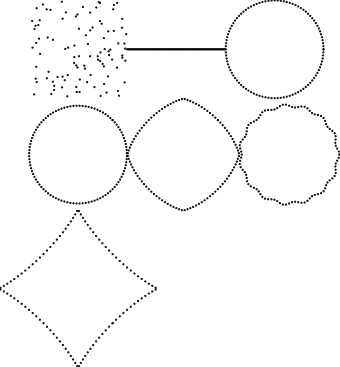

In [4]:
diagram $ vcat [
        hcat (map draw [shot1, shot2, shot3]),
        hcat (map draw [shot4, shot5, shot6]),
        hcat (map draw [shot7])
    ]

Now let's make an Animation from them:  
> play [(shot1, duration1), .... (shotN, durationN)]  

Here, 'duration1' determines how long the animation will take between  
shot1 and shot2, and so on.  
So, the last duration (i.e. durationN) has no significance


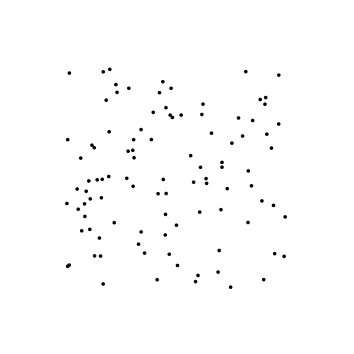

In [72]:
play [(shot1,2), (shot2,4), (shot3,2), (shot4,2), 
      (shot5,4), (shot6,5), (shot7,0)]

## Additional notes

You can manually specifiy the size, shape, color, and other properties of a point, which itself is just a Diagram, by using drawShape instead of draw.  
draw will use a filled circle of size 1.0 by default.  
  
It's also worth noting that size in Diagrams is relative. The components of the figure will automatically be scaled to fit in the final diagram or animation.  
For more on this check out Diagrams documentation:  
https://archives.haskell.org/projects.haskell.org/diagrams/doc/manual.html#measurement-units  
https://archives.haskell.org/projects.haskell.org/diagrams/doc/quickstart.html

The number of points of a snapshot and their order matter:  

Although it depends on the positions of the points,    
assuming equally spaced points (as generated by linspace), more points  
will yeild solid, continuous figures:

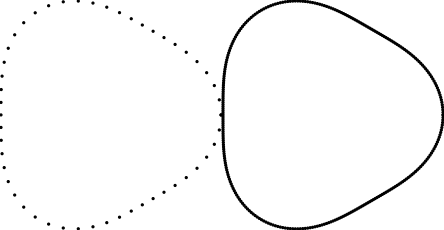

In [2]:
diagram $ (draw $ squigglify 100 3 10 (linspace 50)) ||| 
          (draw $ squigglify 100 3 10 (linspace 300))

Currently "play" can't handle shots of different numbers of of points!  
You can still stitch animations but the transition won't be smooth.   
Consult Diagrams docs for more on how to do this.

The order of the points will affect the paths the points will take in animations:  
first point in shot 1 will move to first point in shot 2, and so on


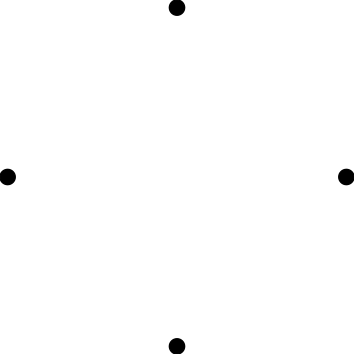

In [54]:
shotA = [(20,0), (0,20), (-20,0), (0,-20)]
shotB = [(0,20), (-20,0), (0,-20), (20,0)]
play [(shotA,2), (shotB,2), (shotA,0)]

Same points just different order:


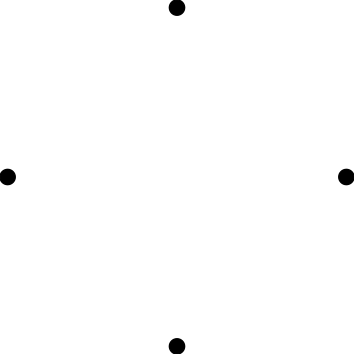

In [58]:
shotA' = [(20,0), (0,20), (-20,0), (0,-20)]
shotB' = [(-20,0), (0,-20), (20,0), (0,20)]
play [(shotA',2), (shotB',2), (shotA',0)]

A longer total duration will require more time to generate the GIF!  
(currently it's rather slow, will fix in the future)